In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import  pad_sequences
from keras.utils.np_utils import to_categorical
from tensorflow.keras.layers import  Dropout,Activation

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!pip install emoji==1.7
import emoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 175 kB 4.1 MB/s 
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171047 sha256=f143e2ce43b2cec8628d299acadec8ba3c56e1d6df3f27bfffb4e73462b3be03
  Stored in directory: /root/.cache/pip/wheels/8a/4e/b6/57b01db010d17ef6ea9b40300af725ef3e210cb1acfb7ac8b6
Successfully built emoji


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/emoji/emoji_data.csv', header=None)
data.head()


,0,1
0,French macaroon is so tasty,4
1,work is horrible,3
2,I am upset,3
3,throw the ball,1
4,Good joke,2


In [ ]:
emoji_dict = {
0: ":red_heart:",
    1: ":baseball:",
    2: ":grinning_face_with_big_eyes:",
    3: ":disappointed_face:",
    4: ":fork_and_knife_with_plate:"
}

def label_to_emoji(label):
    return emoji.emojize(emoji_dict[label])

In [ ]:
import string
import re

**PREPROCESSING**

In [ ]:
def tweet_clean(tweet):
    tweet = str(tweet).lower()
    rm_mention = re.sub(r'@[A-Za-z0-9]+', '', tweet)    
    rm_rt = re.sub(r'RT[/s]+', '', rm_mention)                   # remove @mentions
    rm_links = re.sub(r'http\S+', '', rm_rt)                               # remove hyperlinks
    rm_links = re.sub(r'https?:\/\/\S+','', rm_links)
    rm_nums = re.sub('[0-9]+', '', rm_links)                        # remove numbers
    rm_punc = [char for char in rm_nums if char not in string.punctuation] # remove punctuations
    rm_punc = ''.join(rm_punc)
    cleaned = rm_punc
    
    return cleaned

In [ ]:
data[0]= data[0].apply(tweet_clean)
data.head()

,0,1
0,french macaroon is so tasty,4
1,work is horrible,3
2,i am upset,3
3,throw the ball,1
4,good joke,2


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


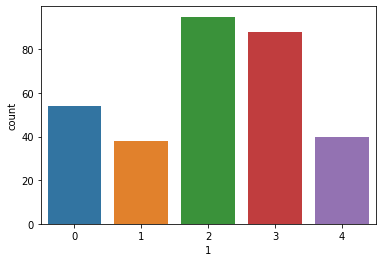

In [ ]:
sns.countplot(data[1]) 

In [ ]:
X= data[0].values
Y= data[1].values

In [ ]:
file = open('/content/drive/MyDrive/glove.6B.100d.txt', 'r', encoding = 'utf8')
content = file.readlines()
file.close()


In [ ]:
embeddings = {}

for line in content:

    line = line.split()
    embeddings[line[0]] = np.array(line[1:], dtype = float)

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)
word2index = tokenizer.word_index

In [ ]:
Xtokens = tokenizer.texts_to_sequences(X)


In [ ]:
def get_maxlen(train_data):
    maxlen = 0
    for sent in train_data:
        maxlen = max(maxlen, len(sent))
    return maxlen

maxlen = get_maxlen(Xtokens)
print(maxlen)

10


In [ ]:
Xtrain = pad_sequences(Xtokens, maxlen = maxlen,  padding = 'post', truncating = 'post')

In [ ]:
Ytrain = to_categorical(Y)


In [ ]:
embed_size = 100
embedding_matrix = np.zeros((len(word2index)+1, embed_size))

for word, i in word2index.items():
    embed_vector = embeddings[word]
    embedding_matrix[i] = embed_vector

In [ ]:
model = Sequential([
    Embedding(input_dim = len(word2index) + 1,
              output_dim = embed_size,
              input_length = maxlen,
              weights = [embedding_matrix],
              trainable = False
             ),
    LSTM(units = 32, return_sequences = True),
    Dropout(0.3),
    LSTM(units = 16),
    Dropout(0.2),
    Dense(5, activation = 'softmax')

    
])

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])



In [ ]:
history=model.fit(Xtrain, Ytrain,validation_split = 0.1, batch_size=32, epochs = 50)



Epoch 1/50
9/9 [==============================] - 6s 143ms/step - loss: 1.5857 - accuracy: 0.2155 - val_loss: 1.5724 - val_accuracy: 0.2188
Epoch 2/50
9/9 [==============================] - 0s 16ms/step - loss: 1.5319 - accuracy: 0.3852 - val_loss: 1.5468 - val_accuracy: 0.2500
Epoch 3/50
9/9 [==============================] - 0s 14ms/step - loss: 1.4719 - accuracy: 0.3852 - val_loss: 1.5058 - val_accuracy: 0.2812
Epoch 4/50
9/9 [==============================] - 0s 15ms/step - loss: 1.4021 - accuracy: 0.4134 - val_loss: 1.4411 - val_accuracy: 0.3125
Epoch 5/50
9/9 [==============================] - 0s 15ms/step - loss: 1.3240 - accuracy: 0.4452 - val_loss: 1.3509 - val_accuracy: 0.3438
Epoch 6/50
9/9 [==============================] - 0s 14ms/step - loss: 1.2583 - accuracy: 0.4346 - val_loss: 1.2946 - val_accuracy: 0.2500
Epoch 7/50
9/9 [==============================] - 0s 18ms/step - loss: 1.1721 - accuracy: 0.5053 - val_loss: 1.2216 - val_accuracy: 0.3750
Epoch 8/50
9/9 [==========

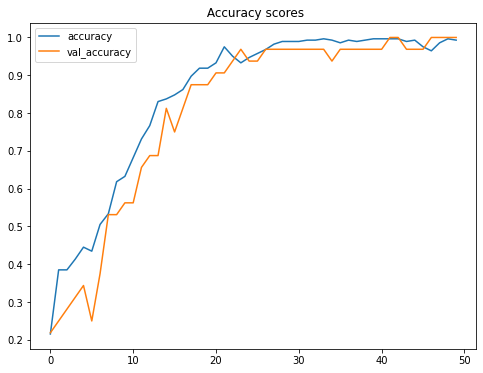

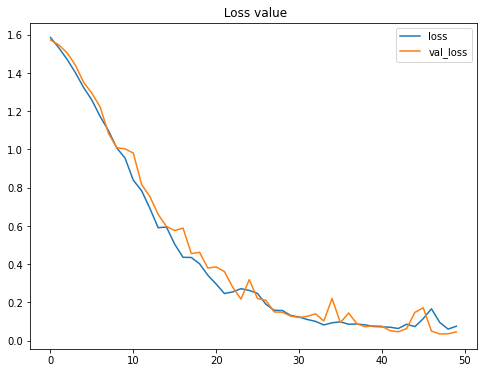

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
get_ipython().run_line_magic('matplotlib', 'inline')
plt.figure(figsize=(8,6))
plt.title(' Accuracy scores')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.show()
plt.figure(figsize=(8,6))
plt.title(' Loss value')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.show()

In [ ]:
model.evaluate(Xtrain,Ytrain)

10/10 [==============================] - 1s 4ms/step - loss: 0.0521 - accuracy: 0.9937


[0.052089691162109375, 0.9936507940292358]

In [ ]:
test_data=pd.read_csv('/content/drive/MyDrive/emoji/test_emoji.csv', header=None)
test_data.head()

,0,1
0,I want to eat\t,4
1,he did not answer\t,3
2,he got a raise\t,2
3,she got me a present\t,0
4,ha ha ha it was so funny\t,2


In [ ]:
test_data[0]=test_data[0].apply(lambda x:x[:-1])
test_data.head()

,0,1
0,I want to eat,4
1,he did not answer,3
2,he got a raise,2
3,she got me a present,0
4,ha ha ha it was so funny,2


In [ ]:
x= test_data[0].values
y= test_data[1].values

In [ ]:
tokenizer1 = Tokenizer()
tokenizer1.fit_on_texts(X)
word2index1 = tokenizer.word_index

In [ ]:
xtokens = tokenizer.texts_to_sequences(x)

In [ ]:
def get_maxlen(train_data):
    maxlen = 0
    for sent in train_data:
        maxlen1 = max(maxlen, len(sent))
    return maxlen

maxlen1 = get_maxlen(Xtokens)
print(maxlen1)

0


In [ ]:
xtest = pad_sequences(Xtokens, maxlen = maxlen,  padding = 'post', truncating = 'post')

In [ ]:
ytest=to_categorical(y)

In [ ]:
test = ["i feel bad","food","i love you","stop shouting","i have a ball"]

test_seq = tokenizer.texts_to_sequences(test)
Xtest = pad_sequences(test_seq, maxlen = maxlen, padding = 'post', truncating = 'post')

y_pred = model.predict(Xtest)
y_pred = np.argmax(y_pred, axis = 1)

for i in range(len(test)):
    print(test[i], label_to_emoji(y_pred[i]))

1/1 [==============================] - 1s 926ms/step
i feel bad 😞
food 🍽️
i love you ❤️
stop shouting 😞
i have a ball ⚾
